In [203]:
import gzip
import idx2numpy
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

### Brief dataset info

Recorded historical documents give us a peek into the past. We are able to glimpse the world before our time; and see its culture, norms, and values to reflect on our own. Japan has very unique historical pathway. Historically, Japan and its culture was relatively isolated from the West, until the Meiji restoration in 1868 where Japanese leaders reformed its education system to modernize its culture. This caused drastic changes in the Japanese language, writing and printing systems. Due to the modernization of Japanese language in this era, cursive Kuzushiji (くずし字) script is no longer taught in the official school curriculum. Even though Kuzushiji had been used for over 1000 years, most Japanese natives today cannot read books written or published over 150 years ago.

The result is that there are hundreds of thousands of Kuzushiji texts that have been digitised but have never been transcribed, and can only currently be read by a few experts. We've built Kuzushiji-MNIST and sister datasets by taking handwritten characters from these texts and preprocessing them in a format similar to the MNIST dataset, to create easy to use benchmark datasets that are more modern and difficult to classify than the original MNIST dataset.

In [220]:
# USE IT TO LOAD DATASETS


# try:
#     from tqdm import tqdm
# except ImportError:
#     tqdm = (
#         lambda x, total, unit: x
#     )  # If tqdm doesn't exist, replace it with a function that does nothing
#     print(
#         "**** Could not import tqdm. Please install tqdm for download progressbars! (pip install tqdm) ****"
#     )

# # Python2 compatibility
# try:
#     input = raw_input
# except NameError:
#     pass

# download_dict = {
#     "1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)": {
#         "1) MNIST data format (ubyte.gz)": [
#             "http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz",
#             "http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz",
#             "http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz",
#             "http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz",
#         ],
#         "2) NumPy data format (.npz)": [
#             "http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz",
#             "http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz",
#             "http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz",
#             "http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz",
#         ],
#     },
#     "2) Kuzushiji-49 (49 classes, 28x28, 270k examples)": {
#         "1) NumPy data format (.npz)": [
#             "http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-imgs.npz",
#             "http://codh.rois.ac.jp/kmnist/dataset/k49/k49-train-labels.npz",
#             "http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-imgs.npz",
#             "http://codh.rois.ac.jp/kmnist/dataset/k49/k49-test-labels.npz",
#         ],
#     },
#     "3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)": {
#         "1) Folders of images (.tar)": [
#             "http://codh.rois.ac.jp/kmnist/dataset/kkanji/kkanji.tar"
#         ],
#     },
# }


# # Download a list of files
# def download_list(url_list):
#     for url in url_list:
#         path = url.split("/")[-1]
#         r = requests.get(url, stream=True)
#         with open(path, "wb") as f:
#             total_length = int(r.headers.get("content-length"))
#             print("Downloading {} - {:.1f} MB".format(path, (total_length / 1024000)))

#             for chunk in tqdm(
#                 r.iter_content(chunk_size=1024),
#                 total=int(total_length / 1024) + 1,
#                 unit="KB",
#             ):
#                 if chunk:
#                     f.write(chunk)
#     print("All dataset files downloaded!")


# # Ask the user about which path to take down the dict
# def traverse_dict(d):
#     print("Please select a download option:")
#     keys = sorted(d.keys())  # Print download options
#     for key in keys:
#         print(key)

#     userinput = input("> ").strip()

#     try:
#         selection = int(userinput) - 1
#     except ValueError:
#         print("Your selection was not valid")
#         traverse_dict(d)  # Try again if input was not valid
#         return

#     selected = keys[selection]

#     next_level = d[selected]
#     if isinstance(
#         next_level, list
#     ):  # If we've hit a list of downloads, download that list
#         download_list(next_level)
#     else:
#         traverse_dict(next_level)  # Otherwise, repeat with the next level


# traverse_dict(download_dict)

In [221]:
def load_kmnist():
    with gzip.open("kuzushiji/train-images-idx3-ubyte.gz", "r") as f:
        x_train = idx2numpy.convert_from_file(f)
    with gzip.open("kuzushiji/train-labels-idx1-ubyte.gz", "r") as f:
        y_train = idx2numpy.convert_from_file(f)
    with gzip.open("kuzushiji/t10k-images-idx3-ubyte.gz", "r") as f:
        x_test = idx2numpy.convert_from_file(f)
    with gzip.open("kuzushiji/t10k-labels-idx1-ubyte.gz", "r") as f:
        y_test = idx2numpy.convert_from_file(f)
    return x_train, y_train, x_test, y_test


x_train, y_train, x_test, y_test = load_kmnist()

x_train.shape

(60000, 28, 28)

### Preprocessing

In [163]:
x_train = x_train / 255
x_test = x_test / 255

In [164]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

### K-MNIST classes

In [165]:
classmap = pd.read_csv("kuzushiji/kmnist_classmap.csv")
classmap

,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


### Plotting 25 kuzushiji hieroglyphs from training dataset

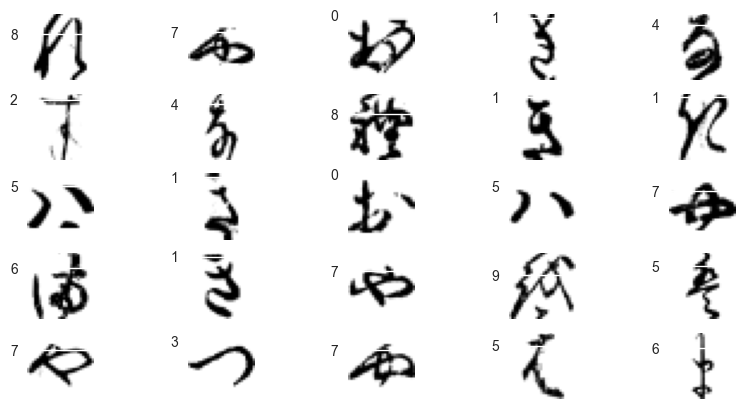

In [166]:
plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([y_train[i]])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

### Model architecture

In [222]:
model = keras.Sequential(
    [
        Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Conv2D(64, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

In [223]:
model.compile(
    optimizer="adam", loss=["categorical_crossentropy"], metrics=["accuracy", "mae"]
)
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_24 (Flatten)        (None, 3136)              0         
                                                                 
 dense_48 (Dense)            (None, 128)             

### Model training

In [224]:
his = model.fit(
    x_train,
    y_train_cat,
    batch_size=32,
    epochs=5,
    validation_split=0.2
    )

Epoch 1/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.5587 - accuracy: 0.8893 - mae: 0.0299 - val_loss: 0.1225 - val_accuracy: 0.9612 - val_mae: 0.0109
Epoch 2/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1400 - accuracy: 0.9568 - mae: 0.0123 - val_loss: 0.0891 - val_accuracy: 0.9711 - val_mae: 0.0078
Epoch 3/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.1024 - accuracy: 0.9673 - mae: 0.0091 - val_loss: 0.0969 - val_accuracy: 0.9732 - val_mae: 0.0068
Epoch 4/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0851 - accuracy: 0.9731 - mae: 0.0074 - val_loss: 0.0993 - val_accuracy: 0.9747 - val_mae: 0.0063
Epoch 5/5
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0742 - accuracy: 0.9774 - mae: 0.0062 - val_loss: 0.0993 - val_accuracy: 0.9737 - val_mae: 0.0063


### Plotting model history

D:\Users\Евгений Артёменко\AppData\Local\Temp\ipykernel_9284\4096877541.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


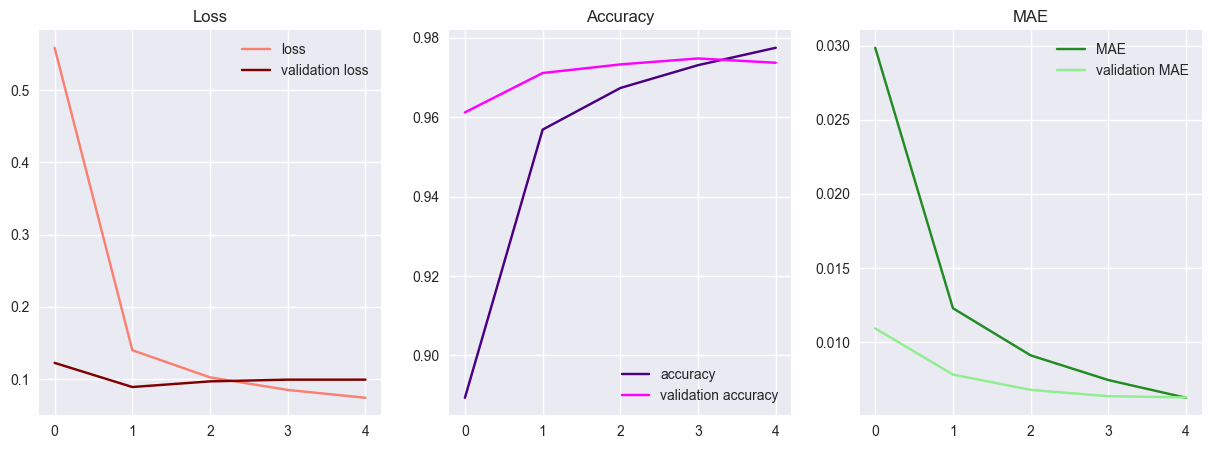

In [225]:
plt.style.use("seaborn")
figure, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title("Loss")
ax[0].plot(his.history["loss"], color="salmon", label="loss")
ax[0].plot(his.history["val_loss"], color="maroon", label="validation loss")
ax[0].legend()

ax[1].set_title("Accuracy")
ax[1].plot(his.history["accuracy"], color="indigo", label="accuracy")
ax[1].plot(his.history["val_accuracy"], color="magenta", label="validation accuracy")
ax[1].legend()

ax[2].set_title("MAE")
ax[2].plot(his.history["mae"], color="forestgreen", label="MAE")
ax[2].plot(his.history["val_mae"], color="lightgreen", label="validation MAE")
ax[2].legend()

### Model testing

In [226]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 3s 8ms/step - loss: 0.2802 - accuracy: 0.9362 - mae: 0.0154


[0.2802484333515167, 0.9362000226974487, 0.01537308655679226]

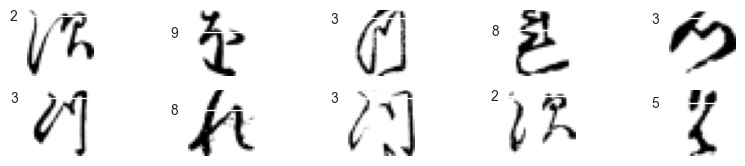

In [215]:
# REAL CLASSES

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([y_test[i]])
    plt.imshow(x_test[i], cmap=plt.cm.binary)

1/1 [==============================] - 0s 97ms/step

#0 hieroglyph: 3
1/1 [==============================] - 0s 21ms/step

#1 hieroglyph: 9
1/1 [==============================] - 0s 23ms/step

#2 hieroglyph: 3
1/1 [==============================] - 0s 21ms/step

#3 hieroglyph: 8
1/1 [==============================] - 0s 23ms/step

#4 hieroglyph: 3
1/1 [==============================] - 0s 22ms/step

#5 hieroglyph: 3
1/1 [==============================] - 0s 33ms/step

#6 hieroglyph: 8
1/1 [==============================] - 0s 15ms/step

#7 hieroglyph: 3
1/1 [==============================] - 0s 27ms/step

#8 hieroglyph: 2
1/1 [==============================] - 0s 18ms/step

#9 hieroglyph: 5


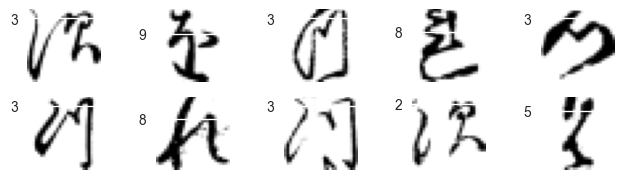

In [216]:
# PREDICTED CLASSES

for i in range(10):
    x = np.expand_dims(x_test[i], axis=0)
    res = model.predict(x)
    print(f"\n#{i} hieroglyph: {np.argmax(res)}")
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([np.argmax(res)])
    plt.imshow(x_test[i], cmap=plt.cm.binary)

In [217]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

mask = pred == y_test

x_false = x_test[~mask]
p_false = pred[~mask]

print("Total test dataset:", x_test.shape[0])
print("Wrong classification:", x_false.shape[0])

313/313 [==============================] - 2s 6ms/step
Total test dataset: 10000
Failed classification: 531


### Plot few false classifications

[Pic 0] Predicted class value: つ (3)
[Pic 1] Predicted class value: す (2)
[Pic 2] Predicted class value: や (7)
[Pic 3] Predicted class value: お (0)
[Pic 4] Predicted class value: な (4)


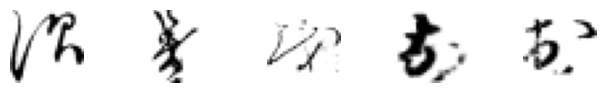

In [218]:
for i in range(5):
    print(
        f"[Pic {i}] Predicted class value: {classmap.iloc[p_false[i]]['char']} ({p_false[i]})"
    )
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

### Conclusion

Під час виконання лабораторної роботи було реалізовано згорткову нейронну мережу, що класифікує дані з датасету K-MNIST.
Остаточочна модель досягає наступних результатів:
- loss: 0.2536
- accuracy: 0.9469
- mae: 0.0126